In [1]:
import numpy as np                                       # fast vectors and matrices
import matplotlib.pyplot as plt                          # plotting
from scipy import fft, ifft

from IPython.display import Audio

from intervaltree import Interval,IntervalTree

%matplotlib inline

In [2]:
fs = 44100            # samples/second
window_size = 2048    # fourier window size
d = 1024              # number of features
m = 128               # number of distinct notes
stride = 512          # samples between windows
wps = fs/float(512)   # windows/second
n = 1000              # training data points per recording

In [3]:
data = np.load('./numpy_version/musicnet.npz', encoding='bytes')

# split our dataset into train and test
test_data = ['2303','2382','1819']
train_data = [f for f in data.files if f not in test_data] # Getting only the index

# Helper functions

In [4]:
def visualize_Y(Y, figsize=(20, 5)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(Y.T, aspect='auto', cmap="ocean_r")
    plt.gca().invert_yaxis() # Because for image, the top left corner is 0,0
    fig.axes[0].set_xlabel("window")
    fig.axes[0].set_ylabel("note (MIDI code)")
    
def visualize_X(X, figsize=(20, 5), frequency_range=(0,1024)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(X.T[frequency_range[0]:frequency_range[1]],aspect='auto')
    plt.gca().invert_yaxis()
    fig.axes[0].set_xlabel('windows (~86Hz)')
    fig.axes[0].set_ylabel('frequency')    
    
class Data:
    def __init__(self, X):
        self.X = X
        wps = fs/stride
        n = int(10*wps)
        self.Xs = np.empty((n,frequency_range[1]-frequency_range[0])) # This container of spectrogram will be used in inverse fft        
    def spectrogram(self, windows_size, stride, length, figsize=(20, 5), frequency_range=(0,1024)):

        for i in range(self.Xs.shape[0]):
            self.Xs[i] = np.abs(fft(self.X[i*stride:i*stride+window_size]))[frequency_range[0]:frequency_range[1]] # Getting Amplitude from fft
        fig = plt.figure(figsize=figsize)
        plt.imshow(self.Xs.T,aspect='auto')
        plt.gca().invert_yaxis()
        fig.axes[0].set_xlabel('windows (~86Hz)')
        fig.axes[0].set_ylabel('frequency')    
        
        for i in range(self.Xs.shape[0]):
            self.Xs[i] = np.abs(fft(self.X[i*stride:i*stride+window_size]))[frequency_range[0]:frequency_range[1]] # Getting Amplitude from fft
        
    def play_audio(self):
        for i in range(X):
            pass

In [99]:
class Data:
    def __init__(self, X, windows_size, stride, length, frequency_range=(0,1024), fs=44100, colorbar=True):
        if X.shape[0] < windows_size:
            print("Check window size and ensure that there's enough sample")
        
        wps = fs/stride
        self.stride = stride
        
        # Check if the audio is long enough
        if length > X.shape[0]/fs:
            print("The audio has only {0:.3f} seconds ".format(X.shape[0]/fs))
            print("Setting the lenght to the maximum audio lenght")
            length = X.shape[0]//fs
        self.n = int(length*wps) # Calulate the total number of windows
        
        self.Xfft = np.empty((self.n,frequency_range[1]-frequency_range[0]),dtype='complex128' ) # Storing audio info for inverse fft       
        self.Xs = np.empty((self.n,frequency_range[1]-frequency_range[0])) # This container of spectrogram will be used in inverse fft  
        self.colorbar = colorbar
        
        for i in range(self.Xs.shape[0]):
                self.Xfft[i] = fft(X[i*stride:i*stride+window_size])[frequency_range[0]:frequency_range[1]]
                self.Xs[i] = np.abs(self.Xfft[i]) # Getting Amplitude from fft

    def spectrogram(self, figsize=(20, 5)):
        fig = plt.figure(figsize=figsize)
        img = plt.imshow(self.Xs.T,aspect='auto', cmap='jet')
        plt.gca().invert_yaxis()
        fig.axes[0].set_xlabel('windows', size=35)
        fig.axes[0].set_ylabel('frequency bins', size=35)   
        fig.axes[0].tick_params(axis='x',labelsize=24)
        fig.axes[0].tick_params(axis='y',labelsize=24)
        if self.colorbar:
            fig.colorbar(img)
        
    def get_Xfft(self):
        return self.Xfft
    def original_audio(self):
        return Audio(X[:self.Xs.shape[0]*self.stride],rate=fs)
        
    def spec_audio(self):
        X_reconstruct = np.empty(self.n)
        for i in range(self.Xs.shape[0]):
            X_reconstruct = ifft(self.Xfft[i])
        return X_reconstruct

In [100]:
X,Y = data['1788']

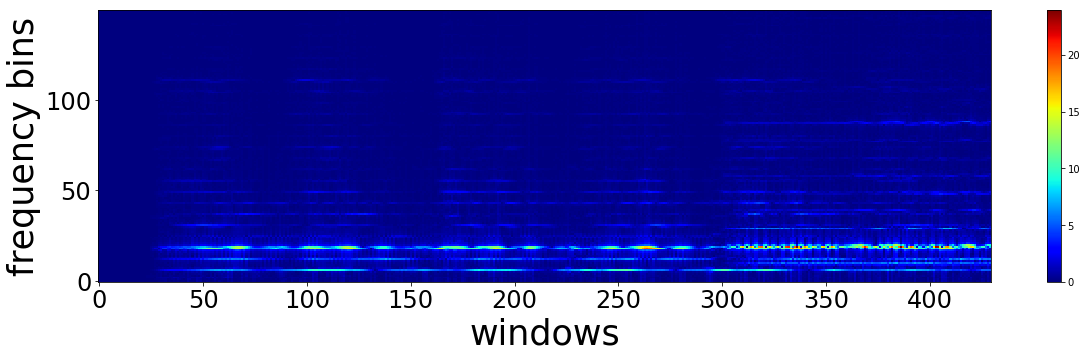

In [113]:
mydata = Data(X,window_size, stride, 5, (0,150))
mydata.spectrogram()

In [114]:
mydata.original_audio()

In [ ]:
f = 10  # Frequency, in cycles per second, or Hertz
fs = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)/(np.exp(t*2)+1)

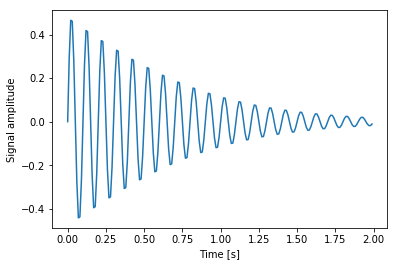

In [507]:
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

In [570]:
window_size = 30    # fourier window size
d = 60              # number of features              # number of distinct notes
stride = 50          # samples between windows
wps = fs/float(stride)   # windows/second
n = 1000              # training data points per recording

In [571]:
wps = fs/stride
stride = stride
n = int(1*wps)

Xfft = np.empty((n,window_size),dtype='complex128' ) # Storing audio info for inverse fft       
Xs = np.empty((n,window_size)) # This container of spectrogram will be used in inverse fft  
X_sec = []

for i in range(Xs.shape[0]):
        X_sec.append(x[i*stride:i*stride+window_size])
        Xfft[i] = fft(X_sec[i])
        Xs[i] = np.abs(Xfft[i]) # Getting Amplitude from fft
        
X_sec = np.array(X_sec)

Text(0, 0.5, 'frequency')

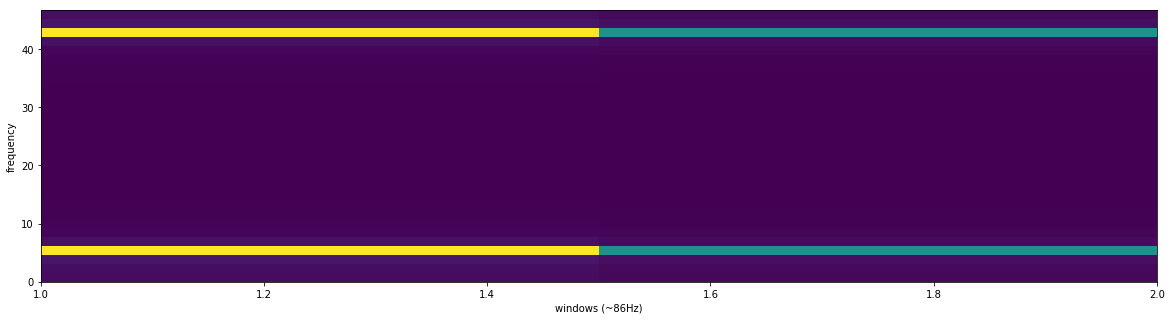

In [604]:
freqs = fftpack.fftfreq(window_size, 1/fs)
fig = plt.figure(figsize=(20,5))
plt.imshow(Xs.T[:d],aspect='auto', interpolation='nearest', extent=[1,Xs.shape[0],0,max(freqs)], origin='lower')
# plt.gca().invert_yaxis()
fig.axes[0].set_xlabel('windows (~86Hz)')
fig.axes[0].set_ylabel('frequency')  

(-1, 1)

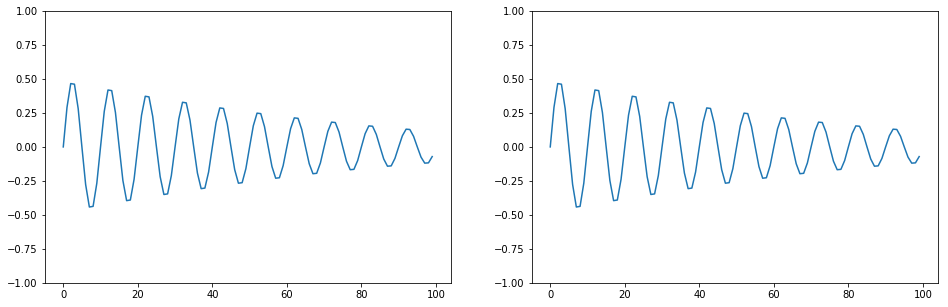

In [439]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].plot(X_sec[0])
ax[0].set_ylim(-1,1)

ax[1].plot(ifft(Xfft[0]).real)
ax[1].set_ylim(-1,1)

# Linear Model

## Getting train data

In [225]:
# Sufficient statistics for least squrares
XTX = np.zeros((d,d))
XTY = np.zeros((d,m))

# Warning: this could take some time
Xs = np.empty((n,d))

n=1000
for recording in train_data:
    print(recording, ',')
    X,Y = data[recording]
    # s = np.random.randint(window_size/2,len(X)-window_size/2,n) # Getting 1000 random start
    random_start_idx = np.random.randint(window_size/2,len(X)-window_size/2)
    s = np.arange(random_start_idx, random_start_idx+n)
    Ys = np.zeros((n,m))
    Xraw = X[:Xs.shape[0]*stride]
    for i in range(Xs.shape[0]):
        # Xs[i] = np.abs(fft(X[(i+2048)*stride-window_size//2:(i+2048)*stride+window_size//2]))[0:d] # [0:d] is getting the frequency bin from 0 to d
        Xs[i] = np.abs(fft(X[i*stride:i*stride+window_size]))[0:d]
        for label in Y[i*stride]:
            Ys[i,label.data[1]] = 1 # label.data[1] is the pitch
    break
    XTX += (1./n)*np.dot(Xs.T,Xs)
    XTY += (1./n)*np.dot(Xs.T,Ys)
XTX /= float(len(train_data))
XTY /= float(len(train_data))

1788 ,


In [135]:
Audio(X[:Xs.shape[0]*stride],rate=fs)

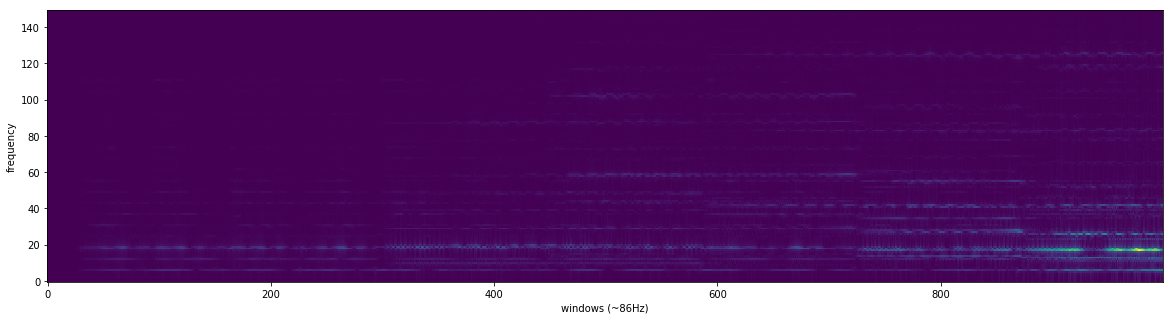

In [134]:
visualize_X(Xs, frequency_range=(0,150))

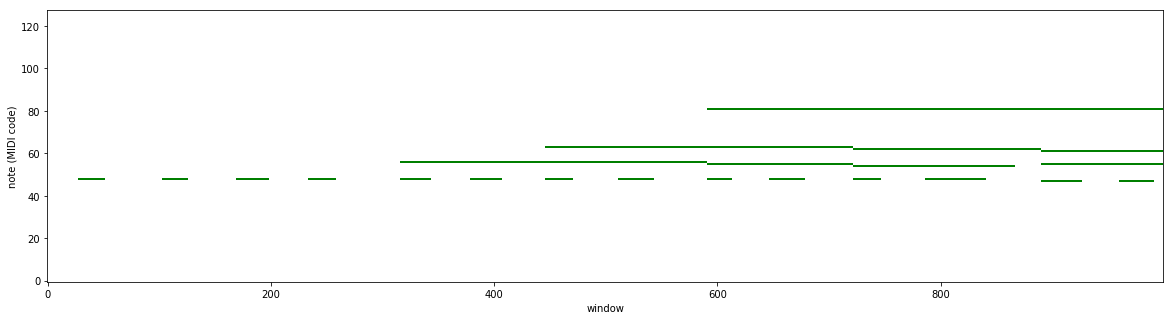

In [127]:
visualize_Y(Ys)

# Creating test data

In [5]:
# create the test set
Xtest = np.empty([3*7500,d])
Ytest = np.zeros([3*7500,m])
for i in range(len(test_data)):
    X,Y = data[test_data[i]]
    for j in range(7500):
        s = fs+j*512 # start from one second to give us some wiggle room for larger segments
        Xtest[7500*i + j] = np.abs(fft(X[s:s+window_size]))[0:d]
        
        # label stuff that's on in the center of the window
        for label in Y[s+d/2]:
            Ytest[7500*i + j,label.data[1]] = 1

In [6]:
Xtest.shape

(22500, 1024)

In [115]:
100%50

0